In [4]:
@file:DependsOn("com.soywiz.korlibs.korio:korio-jvm:2.4.6")
@file:DependsOn("com.soywiz.korlibs.korim:korim-jvm:2.4.6")

In [5]:
import com.soywiz.korma.*
import com.soywiz.korma.geom.*
import com.soywiz.korma.geom.vector.*
import com.soywiz.korim.*
import com.soywiz.korio.*
import com.soywiz.korio.file.*
import com.soywiz.korio.file.std.*
import com.soywiz.korim.*
import com.soywiz.korim.format.*
import com.soywiz.korim.bitmap.*
import com.soywiz.korim.color.*
import com.soywiz.korim.awt.*
import kotlinx.coroutines.*


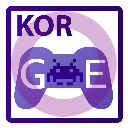

In [6]:
val bitmap = runBlocking { localCurrentDirVfs["korge.png"].readBitmapNoNative(PNG) }

Bitmap32(128, 128, Colors.TRANSPARENT_BLACK).context2d {
    drawImage(bitmap, 0, 0, 128, 128)
    fill(Colors.PURPLE.withAd(0.3)) {
        translate(64, 64)
        scale(1.1)
        circle(0, 0, 48)
        circle(0, 0, 32)
    }
}.toAwt()